## 📦 Step 1: Import Libraries
Import required libraries for data extraction and processing.

In [74]:
import requests
import pandas as pd 
import time
import ast
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv
load_dotenv()

True

## 🔌 Step 2: Define TMDb API Key and Movie IDs
Prepare TMDb API access and list of movie IDs to fetch.

In [75]:
API_KEY = os.getenv("TMDB_API_KEY")
BASE_URL = 'https://api.themoviedb.org/3/movie/'

# List of movie IDs to fetch
movie_ids = [
    0, 299534, 19995, 140607, 299536, 597, 135397,
    420818, 24428, 168259, 99861, 284054, 12445,
    181808, 330457, 351286, 109445, 321612, 260513
]

## 🌐 Step 3: Extract Data from TMDb API
Loop through movie IDs and retrieve data from the TMDb API.

In [76]:
movies_data = []

# Loop through each movie ID and fetch data
for movie_id in movie_ids:
    details_endpoint = f"{BASE_URL}{movie_id}?append_to_response=credits"
    details_params = {
        'api_key': API_KEY,
        'language': 'en-US'
    }

    try:
        # Send GET request
        details_response = requests.get(details_endpoint, params=details_params)
        details_response.raise_for_status()  

        # Parse JSON
        data = details_response.json()
        movies_data.append(data)

        print(f"✔️ Fetched data for movie ID: {movie_id}")

    except requests.exceptions.RequestException as e:
        print(f"❌ Request error for movie ID {movie_id}: {e}")
    except ValueError as e:
        print(f"❌ JSON decode error for movie ID {movie_id}: {e}")

    time.sleep(0.2)  # Optional: Pause to avoid hitting rate limits

# Convert to DataFrame
df_movies = pd.DataFrame(movies_data)

# Preview result
print(f"\nTotal movies fetched successfully: {len(df_movies)}")
print(df_movies.head())

❌ Request error for movie ID 0: 404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/0?append_to_response=credits&api_key=1711e9fb61ca62e3a5ec25f5e79a2df8&language=en-US
✔️ Fetched data for movie ID: 299534
✔️ Fetched data for movie ID: 19995
✔️ Fetched data for movie ID: 140607
✔️ Fetched data for movie ID: 299536
✔️ Fetched data for movie ID: 597
✔️ Fetched data for movie ID: 135397
✔️ Fetched data for movie ID: 420818
✔️ Fetched data for movie ID: 24428
✔️ Fetched data for movie ID: 168259
✔️ Fetched data for movie ID: 99861
✔️ Fetched data for movie ID: 284054
✔️ Fetched data for movie ID: 12445
✔️ Fetched data for movie ID: 181808
✔️ Fetched data for movie ID: 330457
✔️ Fetched data for movie ID: 351286
✔️ Fetched data for movie ID: 109445
✔️ Fetched data for movie ID: 321612
✔️ Fetched data for movie ID: 260513

Total movies fetched successfully: 18
   adult                     backdrop_path  \
0  False  /7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg   
1  False  /vL5LR6WdxW

In [77]:
df_movies2 = df_movies.copy(deep=True)
df_movies2

adult                     backdrop_path  \
0   False  /7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg   
1   False  /vL5LR6WdxWPjLPFRLe133jXWsh5.jpg   
2   False  /k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg   
3   False  /mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg   
4   False  /sCzcYW9h55WcesOqA12cgEr9Exw.jpg   
5   False  /aIGIYJTyOkEVUmEd3z5x6diYsFx.jpg   
6   False  /1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg   
7   False  /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg   
8   False  /cHkhb5A4gQRK6zs6Pv7zorHs8Nk.jpg   
9   False  /6YwkGolwdOMNpbTOmLjoehlVWs5.jpg   
10  False  /b6ZJZHUdMEFECvGiDpJjlfUWela.jpg   
11  False  /n5A7brJCjejceZmHyujwUTVgQNC.jpg   
12  False  /5Iw7zQTHVRBOYpA0V6z0yypOPZh.jpg   
13  False  /AoSZyb37ljMAxw0RdeQEBHKtgcc.jpg   
14  False  /6WA9stUMbIkEPxn3D5SWlA8FIi7.jpg   
15  False  /u2bZhH3nTf0So0UIC1QxAqBvC07.jpg   
16  False  /uU1Mt4JWhDvl4vKb3AfxNsorkoM.jpg   
17  False  /mabuNsGJgRuCTuGqjFkWe1xdu19.jpg   

                                belongs_to_collection     budget  \
0   {'id': 86311, 'name': 'The Avengers Collection...  356000000   
1   {'id': 87096, 'name': 'Avatar Collection', 'po...  237000000   
2   {'id': 10, 'name': 'Star Wars Collection', 'po...  245000000   
3   {'id': 86311, 'name': 'The Avengers Collection...  300000000   
4                                                None  200000000   
5   {'id': 328, 'name': 'Jurassic Park Collection'...  150000000   
6   {'id': 762512, 'name': 'The Lion King (Reboot)...  260000000   
7   {'id': 86311, 'name': 'The Avengers Collection...  220000000   
8   {'id': 9485, 'name': 'The Fast and the Furious...  190000000   
9   {'id': 86311, 'name': 'The Avengers Collection...  365000000   
10  {'id': 529892, 'name': 'Black Panther Collecti...  200000000   
11  {'id': 1241, 'name': 'Harry Potter Collection'...  125000000   
12  {'id': 10, 'name': 'Star Wars Collection', 'po...  200000000   
13  {'id': 386382, 'name': 'Frozen Collection', 'p...  150000000   
14  {'id': 328, 'name': 'Jurassic Park Collection'...  170000000   
15  {'id': 386382, 'name': 'Frozen Collection', 'p...  150000000   
16                                               None  160000000   
17  {'id': 468222, 'name': 'The Incredibles Collec...  200000000   

                                               genres  \
0   [{'id': 12, 'name': 'Adventure'}, {'id': 878, ...   
1   [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
2   [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
3   [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
4   [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
5   [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
6   [{'id': 12, 'name': 'Adventure'}, {'id': 18, '...   
7   [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
8   [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   
9   [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
10  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
11  [{'id': 14, 'name': 'Fantasy'}, {'id': 12, 'na...   
12  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
13  [{'id': 10751, 'name': 'Family'}, {'id': 16, '...   
14  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
15  [{'id': 16, 'name': 'Animation'}, {'id': 10751...   
16  [{'id': 10751, 'name': 'Family'}, {'id': 14, '...   
17  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   

                                             homepage      id    imdb_id  \
0      https://www.marvel.com/movies/avengers-endgame  299534  tt4154796   
1                https://www.avatar.com/movies/avatar   19995  tt0499549   
2   http://www.starwars.com/films/star-wars-episod...  140607  tt2488496   
3   https://www.marvel.com/movies/avengers-infinit...  299536  tt4154756   
4      https://www.paramountmovies.com/movies/titanic     597  tt0120338   
5                      https://www.jurassicworld.com/  135397  tt0369610   
6        https://movies.disney.com/the-lion-king-2019  420818  tt6105098   
7          https://www.marvel.com/movies/the-avengers   24428  tt0848228   
8               https://www.uphe.com/movies/furio

## 🧹 Step 4: Drop Irrelevant Columns
Remove columns that are not useful for analysis.

In [78]:
# List of columns to drop
columns_to_drop = ['adult', 'imdb_id', 'original_title', 'video', 'homepage']

# Drop those columns
df_movies2.drop(columns=columns_to_drop , axis=1 , inplace= True)

## 🛠️ Step 5: Handle JSON Columns
Extract relevant information from nested JSON columns (genres, companies, etc.).

In [79]:
# Extracting nested columns in the data
df_movies2['genres'] = df_movies2['genres'].apply(lambda x: "|".join([d['name'] for d in x]) if isinstance(x, list) else np.nan)

df_movies2['belongs_to_collection'] = df_movies2['belongs_to_collection'].apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)

df_movies2['production_countries'] = df_movies2['production_countries'].apply(lambda x: "|".join([d['name'] for d in x]) if isinstance(x, list) else np.nan)

df_movies2['production_companies'] = df_movies2['production_companies'].apply(lambda x: "|".join([d['name'] for d in x]) if isinstance(x, list) else np.nan)

df_movies2['spoken_languages'] = df_movies2['spoken_languages'].apply(lambda x: "|".join([d['english_name'] for d in x]) if isinstance(x, list) else np.nan)

# Function to parse credits and handle potential errors
def parse_credits(credit):
    try:
        if pd.notnull(credit) and isinstance(credit, str):
            return json.loads(credit)
        else:
            return {}  # Return empty dictionary for invalid or missing data
    except json.JSONDecodeError:
        print(f"Warning: Could not decode JSON for credit: {credit}")
        return {}  # Return empty dictionary if JSON decoding fails


df_movies2['cast'] = df_movies2['credits'].apply(lambda x: '|'.join([d['name'] for d in x.get('cast', []) if isinstance(d, dict) and 'name' in d]) if isinstance(x, dict) else None)
df_movies2['director'] = df_movies2['credits'].apply(lambda x: '|'.join([d['name'] for d in x.get('crew', []) if isinstance(d, dict) and d.get('job') == 'Director']) if isinstance(x, dict) else None)
df_movies2['producer'] = df_movies2['credits'].apply(lambda x: '|'.join([d['name'] for d in x.get('crew', []) if isinstance(d, dict) and d.get('job') == 'Producer']) if isinstance(x, dict) else None)
df_movies2['crew_size'] = df_movies2['credits'].apply(lambda x: len(x.get('crew', [])) if isinstance(x, dict) else 0)
df_movies2['cast_size'] = df_movies2['credits'].apply(lambda x: len(x.get('cast', [])) if isinstance(x, dict) else 0)

df_movies2

backdrop_path                belongs_to_collection  \
0   /7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg              The Avengers Collection   
1   /vL5LR6WdxWPjLPFRLe133jXWsh5.jpg                    Avatar Collection   
2   /k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg                 Star Wars Collection   
3   /mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg              The Avengers Collection   
4   /sCzcYW9h55WcesOqA12cgEr9Exw.jpg                                  NaN   
5   /aIGIYJTyOkEVUmEd3z5x6diYsFx.jpg             Jurassic Park Collection   
6   /1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg    The Lion King (Reboot) Collection   
7   /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg              The Avengers Collection   
8   /cHkhb5A4gQRK6zs6Pv7zorHs8Nk.jpg  The Fast and the Furious Collection   
9   /6YwkGolwdOMNpbTOmLjoehlVWs5.jpg              The Avengers Collection   
10  /b6ZJZHUdMEFECvGiDpJjlfUWela.jpg             Black Panther Collection   
11  /n5A7brJCjejceZmHyujwUTVgQNC.jpg              Harry Potter Collection   
12  /5Iw7zQTHVRBOYpA0V6z0yypOPZh.jpg                 Star Wars Collection   
13  /AoSZyb37ljMAxw0RdeQEBHKtgcc.jpg                    Frozen Collection   
14  /6WA9stUMbIkEPxn3D5SWlA8FIi7.jpg             Jurassic Park Collection   
15  /u2bZhH3nTf0So0UIC1QxAqBvC07.jpg                    Frozen Collection   
16  /uU1Mt4JWhDvl4vKb3AfxNsorkoM.jpg                                  NaN   
17  /mabuNsGJgRuCTuGqjFkWe1xdu19.jpg           The Incredibles Collection   

       budget                                     genres      id  \
0   356000000           Adventure|Science Fiction|Action  299534   
1   237000000   Action|Adventure|Fantasy|Science Fiction   19995   
2   245000000           Adventure|Action|Science Fiction  140607   
3   300000000           Adventure|Action|Science Fiction  299536   
4   200000000                              Drama|Romance     597   
5   150000000  Action|Adventure|Science Fiction|Thriller  135397   
6   260000000           Adventure|Drama|Family|Animation  420818   
7   220000000           Science Fiction|Action|Adventure   24428   
8   190000000                      Action|Thriller|Crime  168259   
9   365000000           Action|Adventure|Science Fiction   99861   
10  200000000           Action|Adventure|Science Fiction  284054   
11  125000000                          Fantasy|Adventure   12445   
12  200000000           Adventure|Action|Science Fiction  181808   
13  150000000  Family|Animation|Adventure|Comedy|Fantasy  330457   
14  170000000  Action|Adventure|Science Fiction|Thriller  351286   
15  150000000         Animation|Family|Adventure|Fantasy  109445   
16  160000000                     Family|Fantasy|Romance  321612   
17  200000000          Action|Adventure|Animation|Family  260513   

   origin_country original_language  \
0            [US]                en   
1            [US]                en   
2            [US]                en   
3            [US]                en   
4            [US]                en   
5            [US]                en   
6            [US]                en   
7            [US]                en   
8            [US]                en   
9            [US]                en   
10           [US]                en   
11           [GB]                en   
12           [US]                en   
13           [US]                en   
14           [US]                en   
15           [US]                en   
16           [US]                en   
17           [US]                en   

                                             overview  popularity  \
0   After the devastating events of Avengers: Infi...     24.2346   
1   In the 22nd century, a paraplegic Marine is di...     32.6950   
2   Thirty years after defeating the Galactic Empi...     13.1664   
3   As the Avengers and their allies have continue...     33.0700   
4   101-year-old Rose DeWitt Bukater tells the sto...     38.6063   
5   Twenty-two years after the events of Jurassic ...     18.1524   
6   Simba idolizes his father, King Mufas

## 📊 Step 6: Data Type Conversion & Cleanup
Convert data types, handle missing values, and clean up the dataset.

In [80]:
#  Convert column datatypes
# Convert 'budget', 'id', 'popularity' to numeric, setting invalid values to NaN
df_movies2['budget'] = pd.to_numeric(df_movies2['budget'], errors='coerce')
df_movies2['id'] = pd.to_numeric(df_movies2['id'], errors='coerce')
df_movies2['popularity'] = pd.to_numeric(df_movies2['popularity'], errors='coerce')

# Convert 'release_date' to datetime
df_movies2['release_date'] = pd.to_datetime(df_movies2['release_date'], errors='coerce')

In [81]:
# Budget/Revenue/Runtime = 0 → Replace with NaN
df_movies2['budget'] = df_movies2['budget'].replace(0, np.nan)
df_movies2['revenue'] = df_movies2['revenue'].replace(0, np.nan)
df_movies2['runtime'] = df_movies2['runtime'].replace(0, np.nan)

# Convert 'budget' and 'revenue' to million USD
df_movies2['budget_musd'] = df_movies2['budget'] / 1_000_000
df_movies2['revenue_musd'] = df_movies2['revenue'] / 1_000_000

# for now, we'll just mark them for review)
df_movies2['vote_average_adjusted'] = df_movies2['vote_average'].where(df_movies2['vote_count'] > 0, np.nan) 
# Set vote_average_adjusted to np.nan if vote_count is 0
# You might want to develop a strategy to adjust vote_average based on similar movies

# 'overview' and 'tagline' → Replace known placeholders with NaN
df_movies2['overview'] = df_movies2['overview'].replace('No Data', np.nan)  # Replace 'No Data' with NaN
df_movies2['tagline'] = df_movies2['tagline'].replace('No Data', np.nan)  # Replace 'No Data' with NaN

In [82]:
df_movies2

backdrop_path                belongs_to_collection  \
0   /7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg              The Avengers Collection   
1   /vL5LR6WdxWPjLPFRLe133jXWsh5.jpg                    Avatar Collection   
2   /k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg                 Star Wars Collection   
3   /mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg              The Avengers Collection   
4   /sCzcYW9h55WcesOqA12cgEr9Exw.jpg                                  NaN   
5   /aIGIYJTyOkEVUmEd3z5x6diYsFx.jpg             Jurassic Park Collection   
6   /1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg    The Lion King (Reboot) Collection   
7   /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg              The Avengers Collection   
8   /cHkhb5A4gQRK6zs6Pv7zorHs8Nk.jpg  The Fast and the Furious Collection   
9   /6YwkGolwdOMNpbTOmLjoehlVWs5.jpg              The Avengers Collection   
10  /b6ZJZHUdMEFECvGiDpJjlfUWela.jpg             Black Panther Collection   
11  /n5A7brJCjejceZmHyujwUTVgQNC.jpg              Harry Potter Collection   
12  /5Iw7zQTHVRBOYpA0V6z0yypOPZh.jpg                 Star Wars Collection   
13  /AoSZyb37ljMAxw0RdeQEBHKtgcc.jpg                    Frozen Collection   
14  /6WA9stUMbIkEPxn3D5SWlA8FIi7.jpg             Jurassic Park Collection   
15  /u2bZhH3nTf0So0UIC1QxAqBvC07.jpg                    Frozen Collection   
16  /uU1Mt4JWhDvl4vKb3AfxNsorkoM.jpg                                  NaN   
17  /mabuNsGJgRuCTuGqjFkWe1xdu19.jpg           The Incredibles Collection   

       budget                                     genres      id  \
0   356000000           Adventure|Science Fiction|Action  299534   
1   237000000   Action|Adventure|Fantasy|Science Fiction   19995   
2   245000000           Adventure|Action|Science Fiction  140607   
3   300000000           Adventure|Action|Science Fiction  299536   
4   200000000                              Drama|Romance     597   
5   150000000  Action|Adventure|Science Fiction|Thriller  135397   
6   260000000           Adventure|Drama|Family|Animation  420818   
7   220000000           Science Fiction|Action|Adventure   24428   
8   190000000                      Action|Thriller|Crime  168259   
9   365000000           Action|Adventure|Science Fiction   99861   
10  200000000           Action|Adventure|Science Fiction  284054   
11  125000000                          Fantasy|Adventure   12445   
12  200000000           Adventure|Action|Science Fiction  181808   
13  150000000  Family|Animation|Adventure|Comedy|Fantasy  330457   
14  170000000  Action|Adventure|Science Fiction|Thriller  351286   
15  150000000         Animation|Family|Adventure|Fantasy  109445   
16  160000000                     Family|Fantasy|Romance  321612   
17  200000000          Action|Adventure|Animation|Family  260513   

   origin_country original_language  \
0            [US]                en   
1            [US]                en   
2            [US]                en   
3            [US]                en   
4            [US]                en   
5            [US]                en   
6            [US]                en   
7            [US]                en   
8            [US]                en   
9            [US]                en   
10           [US]                en   
11           [GB]                en   
12           [US]                en   
13           [US]                en   
14           [US]                en   
15           [US]                en   
16           [US]                en   
17           [US]                en   

                                             overview  popularity  \
0   After the devastating events of Avengers: Infi...     24.2346   
1   In the 22nd century, a paraplegic Marine is di...     32.6950   
2   Thirty years after defeating the Galactic Empi...     13.1664   
3   As the Avengers and their allies have continue...     33.0700   
4   101-year-old Rose DeWitt Bukater tells the sto...     38.6063   
5   Twenty-two years after the events of Jurassic ...     18.1524   
6   Simba idolizes his father, King Mufas

## 🧼 Step 7: Final Cleaning and Filtering
Remove duplicates, filter released movies, reset index.

In [83]:
# Remove duplicates and drop rows with unknown 'id' or 'title'
df_movies2.drop_duplicates(subset=['id', 'title'], inplace=True)
df_movies2.dropna(subset=['id', 'title'], inplace=True)

# Keep only rows where at least 10 columns have non-NaN values
df_movies2 = df_movies2[df_movies2.notna().sum(axis=1) >= 10]

# Filter to include only 'Released' movies, then drop 'status' column
df_movies2 = df_movies2[df_movies2['status'] == 'Released']
df_movies2.drop(columns=['status'], inplace=True)


In [103]:
# Updated desired_order with the correct column names
desired_order = ['id', 'title', 'tagline', 'release_date', 'genres', 'belongs_to_collection',
'original_language', 'budget_musd', 'revenue_musd', 'production_companies',
'production_countries', 'vote_count', 'vote_average', 'popularity', 'runtime',
'overview', 'spoken_languages', 'poster_path', 'cast', 'cast_size', 'director', 'crew_size']

# Reorder the columns
df_movies3 = df_movies2[desired_order]

In [104]:
df_movies3

id                                         title  \
0   299534                             Avengers: Endgame   
1    19995                                        Avatar   
2   140607                  Star Wars: The Force Awakens   
3   299536                        Avengers: Infinity War   
4      597                                       Titanic   
5   135397                                Jurassic World   
6   420818                                 The Lion King   
7    24428                                  The Avengers   
8   168259                                     Furious 7   
9    99861                       Avengers: Age of Ultron   
10  284054                                 Black Panther   
11   12445  Harry Potter and the Deathly Hallows: Part 2   
12  181808                      Star Wars: The Last Jedi   
13  330457                                     Frozen II   
14  351286                Jurassic World: Fallen Kingdom   
15  109445                                        Frozen   
16  321612                          Beauty and the Beast   
17  260513                                 Incredibles 2   

                                              tagline release_date  \
0                                  Avenge the fallen.   2019-04-24   
1                         Enter the world of Pandora.   2009-12-15   
2                       Every generation has a story.   2015-12-15   
3                       Destiny arrives all the same.   2018-04-25   
4           Nothing on Earth could come between them.   1997-11-18   
5                                   The park is open.   2015-06-06   
6                              The king has returned.   2019-07-12   
7                             Some assembly required.   2012-04-25   
8                                Vengeance hits home.   2015-04-01   
9                                 A new age has come.   2015-04-22   
10                                Long live the king.   2018-02-13   
11                                       It all ends.   2011-07-12   
12             Darkness rises...and light to meet it.   2017-12-13   
13                     The past is not what it seems.   2019-11-20   
14                                  The park is gone.   2018-06-06   
15  Only the act of true love will thaw a frozen h...   2013-11-20   
16                                      Be our guest.   2017-03-16   
17                      It's been too long, dahlings.   2018-06-14   

                                       genres  \
0            Adventure|Science Fiction|Action   
1    Action|Adventure|Fantasy|Science Fiction   
2            Adventure|Action|Science Fiction   
3            Adventure|Action|Science Fiction   
4                               Drama|Romance   
5   Action|Adventure|Science Fiction|Thriller   
6            Adventure|Drama|Family|Animation   
7            Science Fiction|Action|Adventure   
8                       Action|Thriller|Crime   
9            Action|Adventure|Science Fiction   
10           Action|Adventure|Science Fiction   
11                          Fantasy|Adventure   
12           Adventure|Action|Science Fiction   
13  Family|Animation|Adventure|Comedy|Fantasy   
14  Action|Adventure|Science Fiction|Thriller   
15         Animation|Family|Adventure|Fantasy   
16                     Family|Fantasy|Romance   
17          Action|Adventure|Animation|Family   

                  belongs_to_collection original_language  budget_musd  \
0               The Avengers Collection                en        356.0   
1                     Avatar Collection                en        237.0   
2                  Star Wars Collection                en        245.0   
3               The Avengers Collection                en        300.0   
4                                   NaN                en        200.0   
5              Jurassic Park Collection                en        150.0   
6     The Lion King (Reboot) Collection                en        260.0   
7           

## 📈 Step 8: Define KPI Metrics
Rank movies by revenue, profit, ROI, and other performance indicators.

In [105]:
def rank_movies(df, column, ascending=False, filter_col=None, filter_val=None):
  
    if filter_col and filter_val:
        filtered_df = df[df[filter_col] >= filter_val]  # Apply filter if specified
    else:
        filtered_df = df

    ranked_df = filtered_df.sort_values(by=column, ascending=ascending)
    ranked_df['rank'] = ranked_df[column].rank(ascending=ascending, method='first')
    
    return ranked_df[['id', 'title', column, 'rank']].head(10)  # Return top 10 ranked movies

In [106]:
# Movies with the best Revenue
print("Highest Revenue:")
print(rank_movies(df_movies3, 'revenue_musd'))

Highest Revenue:
        id                         title  revenue_musd  rank
1    19995                        Avatar   2923.706026   1.0
0   299534             Avengers: Endgame   2799.439100   2.0
4      597                       Titanic   2264.162353   3.0
2   140607  Star Wars: The Force Awakens   2068.223624   4.0
3   299536        Avengers: Infinity War   2052.415039   5.0
5   135397                Jurassic World   1671.537444   6.0
6   420818                 The Lion King   1662.020819   7.0
7    24428                  The Avengers   1518.815515   8.0
8   168259                     Furious 7   1515.400000   9.0
13  330457                     Frozen II   1453.683476  10.0


In [107]:
# Movies with the highest Budget
print("\nHighest Budget:")
print(rank_movies(df_movies3, 'budget_musd'))


Highest Budget:
        id                         title  budget_musd  rank
9    99861       Avengers: Age of Ultron        365.0   1.0
0   299534             Avengers: Endgame        356.0   2.0
3   299536        Avengers: Infinity War        300.0   3.0
6   420818                 The Lion King        260.0   4.0
2   140607  Star Wars: The Force Awakens        245.0   5.0
1    19995                        Avatar        237.0   6.0
7    24428                  The Avengers        220.0   7.0
4      597                       Titanic        200.0   8.0
10  284054                 Black Panther        200.0   9.0
12  181808      Star Wars: The Last Jedi        200.0  10.0


In [108]:
#Movies with the Highest Profit
print("\nHighest Profit:")
df_movies3['profit'] = df_movies3['revenue_musd'] - df_movies3['budget_musd']  # Calculate profit
print(rank_movies(df_movies3, 'profit'))


Highest Profit:
        id                         title       profit  rank
1    19995                        Avatar  2686.706026   1.0
0   299534             Avengers: Endgame  2443.439100   2.0
4      597                       Titanic  2064.162353   3.0
2   140607  Star Wars: The Force Awakens  1823.223624   4.0
3   299536        Avengers: Infinity War  1752.415039   5.0
5   135397                Jurassic World  1521.537444   6.0
6   420818                 The Lion King  1402.020819   7.0
8   168259                     Furious 7  1325.400000   8.0
13  330457                     Frozen II  1303.683476   9.0
7    24428                  The Avengers  1298.815515  10.0


/tmp/ipykernel_5263/1212917677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies3['profit'] = df_movies3['revenue_musd'] - df_movies3['budget_musd']  # Calculate profit


In [109]:
# Movies with the least Profit
print("\nLowest Profit:")
print(rank_movies(df_movies3, 'profit', ascending=True))


Lowest Profit:
        id                                         title       profit  rank
9    99861                       Avengers: Age of Ultron  1040.403694   1.0
17  260513                                 Incredibles 2  1042.805359   2.0
16  321612                          Beauty and the Beast  1106.115964   3.0
15  109445                                        Frozen  1124.219009   4.0
12  181808                      Star Wars: The Last Jedi  1132.698830   5.0
14  351286                Jurassic World: Fallen Kingdom  1140.466296   6.0
10  284054                                 Black Panther  1149.926083   7.0
11   12445  Harry Potter and the Deathly Hallows: Part 2  1216.511219   8.0
7    24428                                  The Avengers  1298.815515   9.0
13  330457                                     Frozen II  1303.683476  10.0


In [110]:
#Highest ROI (Budget >= 10M)
print("\nHighest ROI (Budget >= 10M):")
df_movies3['roi'] = df_movies3['revenue_musd'] / df_movies3['budget_musd']  # Calculate ROI
print(rank_movies(df_movies3, 'roi', filter_col='budget_musd', filter_val=10))


Highest ROI (Budget >= 10M):
        id                                         title        roi  rank
1    19995                                        Avatar  12.336312   1.0
4      597                                       Titanic  11.320812   2.0
5   135397                                Jurassic World  11.143583   3.0
11   12445  Harry Potter and the Deathly Hallows: Part 2  10.732090   4.0
13  330457                                     Frozen II   9.691223   5.0
15  109445                                        Frozen   8.494793   6.0
2   140607                  Star Wars: The Force Awakens   8.441729   7.0
8   168259                                     Furious 7   7.975789   8.0
16  321612                          Beauty and the Beast   7.913225   9.0
0   299534                             Avengers: Endgame   7.863593  10.0


/tmp/ipykernel_5263/1874524442.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies3['roi'] = df_movies3['revenue_musd'] / df_movies3['budget_musd']  # Calculate ROI


In [111]:
#Lowest ROI (Budget >= 10M)
print("\nLowest ROI (Budget >= 10M):")
print(rank_movies(df_movies3, 'roi', ascending=True, filter_col='budget_musd', filter_val=10))


Lowest ROI (Budget >= 10M):
        id                           title       roi  rank
9    99861         Avengers: Age of Ultron  3.850421   1.0
17  260513                   Incredibles 2  6.214027   2.0
6   420818                   The Lion King  6.392388   3.0
12  181808        Star Wars: The Last Jedi  6.663494   4.0
10  284054                   Black Panther  6.749630   5.0
3   299536          Avengers: Infinity War  6.841383   6.0
7    24428                    The Avengers  6.903707   7.0
14  351286  Jurassic World: Fallen Kingdom  7.708625   8.0
0   299534               Avengers: Endgame  7.863593   9.0
16  321612            Beauty and the Beast  7.913225  10.0


In [112]:
#Most Voted Movies
print("\nMost Voted Movies:")
print(rank_movies(df_movies3, 'vote_count'))



Most Voted Movies:
        id                                         title  vote_count  rank
1    19995                                        Avatar       32119   1.0
7    24428                                  The Avengers       31510   2.0
3   299536                        Avengers: Infinity War       30390   3.0
0   299534                             Avengers: Endgame       26211   4.0
4      597                                       Titanic       25867   5.0
9    99861                       Avengers: Age of Ultron       23349   6.0
10  284054                                 Black Panther       22490   7.0
11   12445  Harry Potter and the Deathly Hallows: Part 2       20938   8.0
5   135397                                Jurassic World       20626   9.0
2   140607                  Star Wars: The Force Awakens       19667  10.0


In [113]:
#Highest Rated Movies (Votes >= 10)
print("\nHighest Rated Movies (Votes >= 10):")
print(rank_movies(df_movies3, 'vote_average', filter_col='vote_count', filter_val=10))


Highest Rated Movies (Votes >= 10):
        id                                         title  vote_average  rank
0   299534                             Avengers: Endgame         8.238   1.0
3   299536                        Avengers: Infinity War         8.236   2.0
11   12445  Harry Potter and the Deathly Hallows: Part 2         8.087   3.0
4      597                                       Titanic         7.900   4.0
7    24428                                  The Avengers         7.734   5.0
1    19995                                        Avatar         7.588   6.0
17  260513                                 Incredibles 2         7.454   7.0
10  284054                                 Black Panther         7.373   8.0
9    99861                       Avengers: Age of Ultron         7.271   9.0
2   140607                  Star Wars: The Force Awakens         7.262  10.0


In [114]:
#Lowest Rated Movies (Votes >= 10)
print("\nLowest Rated Movies (Votes >= 10):")
print(rank_movies(df_movies3, 'vote_average', ascending=True, filter_col='vote_count', filter_val=10))


Lowest Rated Movies (Votes >= 10):
        id                           title  vote_average  rank
14  351286  Jurassic World: Fallen Kingdom         6.538   1.0
5   135397                  Jurassic World         6.693   2.0
12  181808        Star Wars: The Last Jedi         6.780   3.0
16  321612            Beauty and the Beast         6.971   4.0
6   420818                   The Lion King         7.109   5.0
8   168259                       Furious 7         7.225   6.0
15  109445                          Frozen         7.247   7.0
13  330457                       Frozen II         7.250   8.0
2   140607    Star Wars: The Force Awakens         7.262   9.0
9    99861         Avengers: Age of Ultron         7.271  10.0


In [115]:
# Most Popular Movies
print("\nMost Popular Movies:")
print(rank_movies(df_movies3, 'popularity'))


Most Popular Movies:
        id                                         title  popularity  rank
4      597                                       Titanic     38.6063   1.0
7    24428                                  The Avengers     34.6271   2.0
3   299536                        Avengers: Infinity War     33.0700   3.0
1    19995                                        Avatar     32.6950   4.0
0   299534                             Avengers: Endgame     24.2346   5.0
6   420818                                 The Lion King     21.9093   6.0
15  109445                                        Frozen     21.2794   7.0
11   12445  Harry Potter and the Deathly Hallows: Part 2     18.3030   8.0
5   135397                                Jurassic World     18.1524   9.0
16  321612                          Beauty and the Beast     17.7192  10.0


## 🕵️ Step 9: Advanced Movie Searches
Filter movies based on custom queries like actor/genre/director combinations.

In [116]:
#best-rated Science Fiction Action movies starring Bruce Willis (sorted by Rating - highest to lowest).

search1_results = df_movies3[
    df_movies2['genres'].str.contains('Science Fiction', na=False) &
    df_movies2['genres'].str.contains('Action', na=False) &
    df_movies2['cast'].str.contains('Bruce Willis', na=False)
].sort_values(by=['vote_average', 'vote_count'], ascending=[False, False])

print("\nSearch 1 Results:")
print(search1_results[['title', 'genres', 'cast', 'vote_average', 'vote_count']])


Search 1 Results:
Empty DataFrame
Columns: [title, genres, cast, vote_average, vote_count]
Index: []


In [117]:
#Find movies starring Uma Thurman, directed by Quentin Tarantino (sorted by runtime - shortest to longest).
search2_results = df_movies3[
    df_movies2['cast'].str.contains('Uma Thurman', na=False) &
    df_movies2['director'].str.contains('Quentin Tarantino', na=False)
].sort_values(by='runtime')  # Sort by runtime (shortest to longest)

print("\nSearch 2 Results:")
print(search2_results[['title', 'cast', 'director', 'runtime']])


Search 2 Results:
Empty DataFrame
Columns: [title, cast, director, runtime]
Index: []


In [118]:
# Create a column to indicate franchise movies
df_movies3['is_franchise'] = df_movies2['belongs_to_collection'].notna()

# Group by franchise status and calculate metrics
franchise_vs_standalone = df_movies3.groupby('is_franchise')[
    ['revenue_musd', 'roi', 'budget_musd', 'popularity', 'vote_average']
].agg(['mean', 'median'])  # Calculate mean and median for each metric

# Rename columns for better readability
franchise_vs_standalone.columns = ['_'.join(col) for col in franchise_vs_standalone.columns]

print("\nFranchise vs. Standalone Movie Performance:")
print(franchise_vs_standalone)


Franchise vs. Standalone Movie Performance:
              revenue_musd_mean  revenue_musd_median  roi_mean  roi_median  \
is_franchise                                                                 
False               1765.139159          1765.139159  9.617018    9.617018   
True                1682.641971          1484.541738  8.000174    7.786109   

              budget_musd_mean  budget_musd_median  popularity_mean  \
is_franchise                                                          
False                  180.000               180.0        28.162750   
True                   219.875               200.0        19.622387   

              popularity_median  vote_average_mean  vote_average_median  
is_franchise                                                             
False                  28.16275           7.435500               7.4355  
True                   17.73040           7.380312               7.2665  


/tmp/ipykernel_5263/1763794886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies3['is_franchise'] = df_movies2['belongs_to_collection'].notna()


## 🎞️ Step 10: Franchise vs Standalone Analysis
Compare performance of franchise movies with standalone movies.

In [135]:
# Label each movie as 'Franchise' or 'Standalone' based on collection info
df_movies3['franchise_status'] = df_movies2['belongs_to_collection'].notna().map({
    True: 'Franchise',
    False: 'Standalone'
})

# Define the metrics to analyze
metrics = ['revenue_musd', 'roi', 'budget_musd', 'popularity', 'vote_average']

# Group by franchise status and calculate both mean and median for each metric
franchise_comparison = df_movies3.groupby('franchise_status')[metrics].agg(['mean', 'median'])

# Flatten the MultiIndex columns (e.g., ('revenue_musd', 'mean') → 'revenue_musd_mean')
franchise_comparison.columns = ['_'.join([metric, stat]) for metric, stat in franchise_comparison.columns]

# Display the results
print("\nFranchise vs. Standalone Movie Performance Comparison:")
print(franchise_comparison)



Franchise vs. Standalone Movie Performance Comparison:
                  revenue_musd_mean  revenue_musd_median  roi_mean  \
franchise_status                                                     
Franchise               1682.641971          1484.541738  8.000174   
Standalone              1765.139159          1765.139159  9.617018   

                  roi_median  budget_musd_mean  budget_musd_median  \
franchise_status                                                     
Franchise           7.786109           219.875               200.0   
Standalone          9.617018           180.000               180.0   

                  popularity_mean  popularity_median  vote_average_mean  \
franchise_status                                                          
Franchise               19.622387           17.73040           7.380312   
Standalone              28.162750           28.16275           7.435500   

                  vote_average_median  
franchise_status                       
F

/tmp/ipykernel_5263/1935226047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies3['franchise_status'] = df_movies2['belongs_to_collection'].notna().map({



## 🎞️ Step 11: Most Successful Franchises & Directors

In [120]:
#  Most Successful Movie Franchises
franchise_performance = df_movies3[df_movies3['belongs_to_collection'].notna()].groupby('belongs_to_collection').agg(
    num_movies=('id', 'count'),
    total_budget=('budget_musd', 'sum'),
    mean_budget=('budget_musd', 'mean'),
    total_revenue=('revenue_musd', 'sum'),
    mean_revenue=('revenue_musd', 'mean'),
    mean_rating=('vote_average', 'mean')
).sort_values(by=['num_movies', 'total_revenue'], ascending=[False, False])

print("\nMost Successful Movie Franchises:")
print(franchise_performance)


Most Successful Movie Franchises:
                                     num_movies  total_budget  mean_budget  \
belongs_to_collection                                                        
The Avengers Collection                       4        1241.0       310.25   
Star Wars Collection                          2         445.0       222.50   
Jurassic Park Collection                      2         320.0       160.00   
Frozen Collection                             2         300.0       150.00   
Avatar Collection                             1         237.0       237.00   
The Lion King (Reboot) Collection             1         260.0       260.00   
The Fast and the Furious Collection           1         190.0       190.00   
Black Panther Collection                      1         200.0       200.00   
Harry Potter Collection                       1         125.0       125.00   
The Incredibles Collection                    1         200.0       200.00   

                            

In [121]:
# Most Successful Directors
director_performance = df_movies3.groupby('director').agg(
    num_movies=('id', 'count'),
    total_revenue=('revenue_musd', 'sum'),
    mean_rating=('vote_average', 'mean')
).sort_values(by=['num_movies', 'total_revenue'], ascending=[False, False])

print("\nMost Successful Directors:")
print(director_performance)


Most Successful Directors:
                         num_movies  total_revenue  mean_rating
director                                                       
James Cameron                     2    5187.868379       7.7440
Anthony Russo|Joe Russo           2    4851.854139       8.2370
Joss Whedon                       2    2924.219209       7.5025
Jennifer Lee|Chris Buck           2    2727.902485       7.2485
J.J. Abrams                       1    2068.223624       7.2620
Colin Trevorrow                   1    1671.537444       6.6930
Jon Favreau                       1    1662.020819       7.1090
James Wan                         1    1515.400000       7.2250
Ryan Coogler                      1    1349.926083       7.3730
David Yates                       1    1341.511219       8.0870
Rian Johnson                      1    1332.698830       6.7800
J.A. Bayona                       1    1310.466296       6.5380
Bill Condon                       1    1266.115964       6.9710
Brad Bird   

## 📉 Step 14: Visualization 
visualization of data tasks.

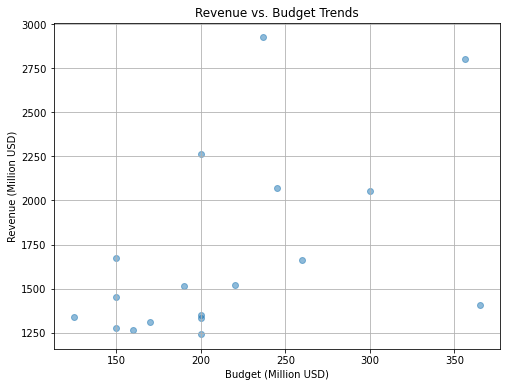

In [122]:
# Revenue vs. Budget Trends
plt.figure(figsize=(8, 6))
plt.scatter(df_movies3['budget_musd'], df_movies3['revenue_musd'], alpha=0.5)
plt.title('Revenue vs. Budget Trends')
plt.xlabel('Budget (Million USD)')
plt.ylabel('Revenue (Million USD)')
plt.grid(True)
plt.show()

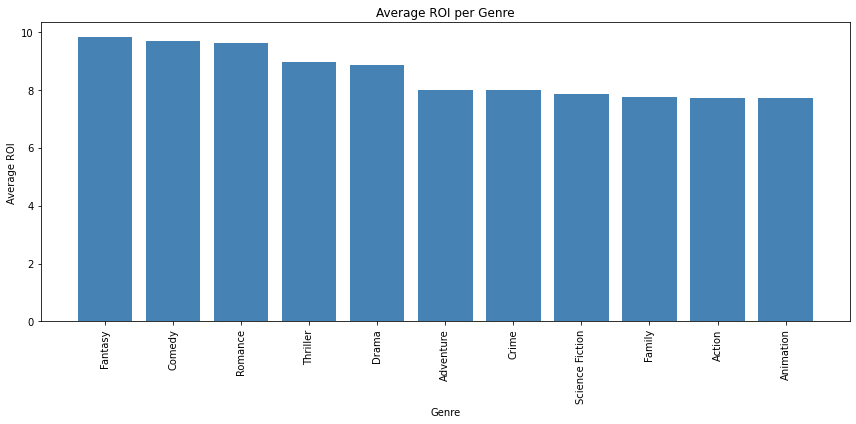

In [130]:
# ROI Distribution by Genre
# Split the genres column into lists
df_genre_exploded = df_movies3.copy()
df_genre_exploded['genres'] = df_genre_exploded['genres'].str.split('|')

# Explode to turn each genre into its own row
df_genre_exploded = df_genre_exploded.explode('genres')

# Now it's safe to group by genres (they're individual strings now)
avg_roi_by_genre = df_genre_exploded.groupby('genres')['roi'].mean().sort_values(ascending=False)

# Plot using blue bars
plt.figure(figsize=(12, 6))
plt.bar(avg_roi_by_genre.index, avg_roi_by_genre.values, color='steelblue')
plt.title('Average ROI per Genre')
plt.xlabel('Genre')
plt.ylabel('Average ROI')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



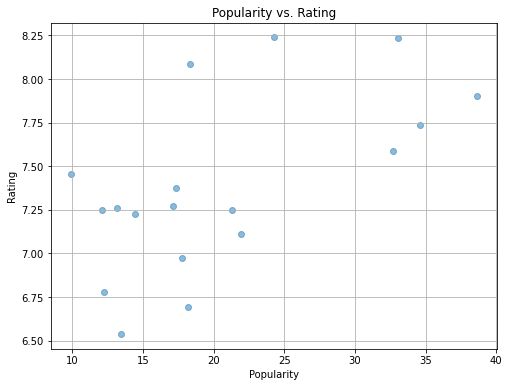

In [131]:
# Popularity vs. Rating
plt.figure(figsize=(8, 6))
plt.scatter(df_movies3['popularity'], df_movies3['vote_average'], alpha=0.5)
plt.title('Popularity vs. Rating')
plt.xlabel('Popularity')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

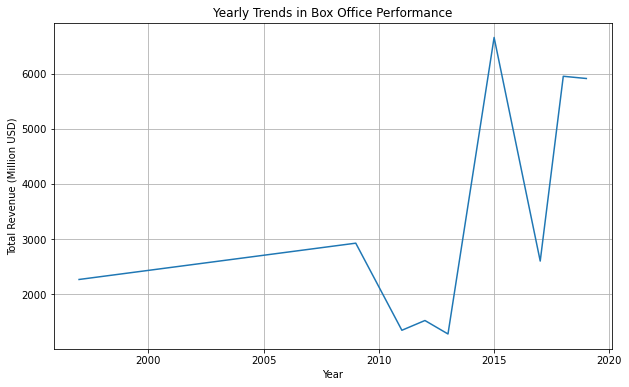

In [132]:
# Yearly Trends in Box Office Performance
yearly_performance = df_movies3.groupby(df_movies2['release_date'].dt.year)['revenue_musd'].sum()
plt.figure(figsize=(10, 6))
yearly_performance.plot(kind='line')
plt.title('Yearly Trends in Box Office Performance')
plt.xlabel('Year')
plt.ylabel('Total Revenue (Million USD)')
plt.grid(True)
plt.show()

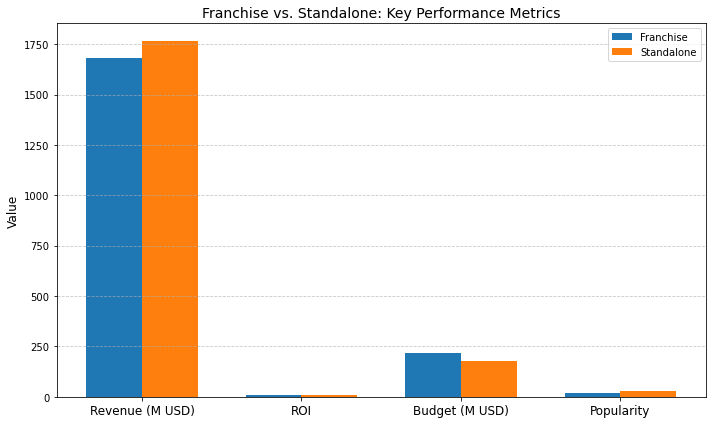

In [ ]:
# Manually define the comparison values 📊 Plotted Metrics (All are Means)
metrics = ['Revenue (M USD)', 'ROI', 'Budget (M USD)', 'Popularity']
franchise_values = [1682.64, 8.00, 219.88, 19.62]
standalone_values = [1765.14, 9.62, 180.00, 28.16]

x = range(len(metrics))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
ax.bar([i - bar_width/2 for i in x], franchise_values, width=bar_width, label='Franchise', color='#1f77b4')
ax.bar([i + bar_width/2 for i in x], standalone_values, width=bar_width, label='Standalone', color='#ff7f0e')

# Customize chart
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12)
ax.set_ylabel('Value', fontsize=12)
ax.set_title('Franchise vs. Standalone: Key Performance Metrics', fontsize=14)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
